In [8]:

dsm = """
[    
    {
        "type":"readers.las",
        "filename":"Test.laz",
        "compression":"laszip"
    },
    {
        "type":"filters.expression",
        "expression":"Classification == 1"
    },
    {
        "type":"writers.gdal",
        "filename":"test_dsm.tif",
        "output_type":"idw",
        "gdaldriver":"GTiff",
        "resolution": 1,
        "radius": 1, 
        "nodata": -10
    }
]
"""

dtm = """
 [  
    {
        "type":"readers.las",
        "filename":"Test.laz",
        "compression":"laszip"
    },
    {
        "type":"filters.expression",
        "expression":"Classification == 2"
    },
    {
        "type":"writers.gdal",
        "filename":"test_dtm.tif",
        "output_type":"idw",
        "gdaldriver":"GTiff",
        "resolution": 1,
        "radius": 1,
        "nodata": -10
    }
]
"""


import pdal

pipeline_dsm = pdal.Pipeline(dsm)
pipeline_dtm = pdal.Pipeline(dtm)





In [9]:
pipeline_dsm.execute()
pipeline_dtm.execute()

2804206

COMPD_CS["NAD83(2011) / UTM zone 16N + NAVD88 height - Geoid12B (metre)",PROJCS["NAD83(2011) / UTM zone 16N",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6345"]],VERT_CS["NAVD88 height",VERT_DATUM["North American Vertical Datum 1988",2005,AUTHORITY["EPSG","5103"]],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Gravity-related height",UP],AUTHORITY["EPSG","5703"]]]
| 1.00, 0.00, 499500.00|
| 0.00,-1.00, 3643500.00|
| 0.00, 0.00, 1.00|
float

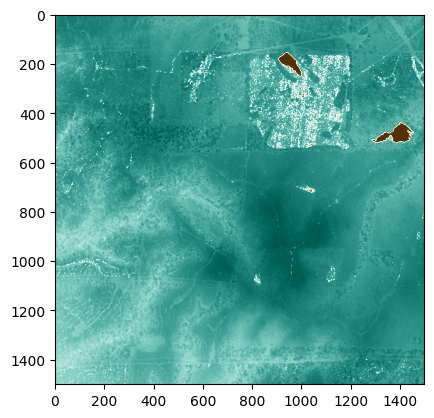

float64
(1500, 1500)


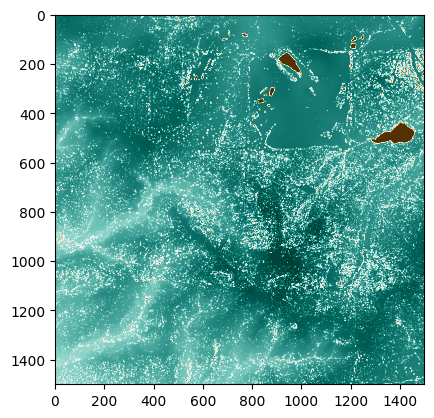

float64
(1500, 1500)


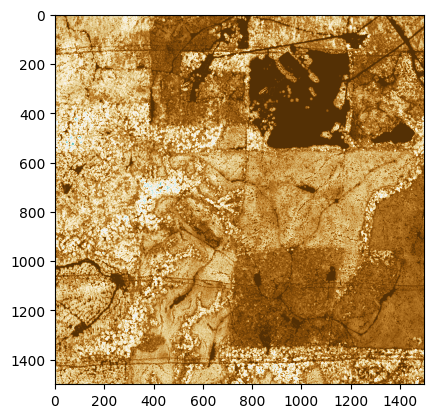

In [14]:
import rasterio
import numpy as np
from rasterio import Affine
import matplotlib.pyplot as plt

raster_specs = rasterio.open('test.tif')
raster_crs = raster_specs.crs
raster_transform = raster_specs.transform

print(raster_crs)
print(raster_transform)

raster_a = rasterio.open('test_dsm.tif').read(1)
raster_b = rasterio.open('test_dtm.tif').read(1)

raster_chm = np.zeros([1500,1500],dtype=np.float64)

np.subtract(raster_a,raster_b,out=raster_chm)
mask_null = (raster_a == -10) | (raster_b == -10)
mask_small = (raster_chm <1.83)
raster_chm[mask_null] = 0
raster_chm[mask_small] = 0

print(raster_a.dtype)
print(raster_a.shape)
plt.imshow(raster_a,cmap = "BrBG")
plt.show()
print(raster_b.dtype)
print(raster_b.shape)
plt.imshow(raster_b,cmap = "BrBG")
plt.show()
print(raster_chm.dtype)
print(raster_chm.shape)
plt.imshow(raster_chm,cmap = "BrBG")
plt.show()


with rasterio.open(
    'test_chm1.tif',
    'w',
    driver='GTiff',
    height=raster_chm.shape[0],
    width=raster_chm.shape[1],
    count=1,
    dtype=raster_a.dtype,
    crs=raster_crs,
    transform=raster_transform
) as dst:
    dst.write(raster_chm,1)
    dst.close()



In [13]:
max_chm = np.amax(raster_chm)
min_chm = np.amin(raster_chm)
max_a = np.amax(raster_a)
max_b = np.amax(raster_b)

print(max_chm)
print(min_chm)
print(max_a)
print(max_b)

max_index = np.unravel_index(np.argmax(raster_chm),raster_chm.shape)
print("Location of the maximum value:", max_index)

value_a = raster_a[958,945]
value_b = raster_b[958,945]

print(value_a,value_b)

38.491169521290004
0.0
198.81340795084117
177.70630390915022
Location of the maximum value: (752, 383)
195.30432086063294 -10.0
